In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, InputLayer, LSTM, GRU, Bidirectional
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
import matplotlib.pyplot as plt
import itertools

2023-05-12 15:32:44.627063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 15:32:50.436481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mukundan/anaconda3/envs/aifit/lib/
2023-05-12 15:32:50.436623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mukundan/anaconda3/envs/aifit/lib/
2023-05-12 15:32:50.436630: W tensorflow/compi

In [2]:
path_load='/home/mukundan/Desktop/VIII_SEM/Data/labelled_data/npy_files'
path_save='/home/mukundan/Desktop/VIII_SEM/Data/labelled_data/media'

data_list=os.listdir(path_load)

In [3]:
df={'Filename':[], 
    'Label': [],
    'Array': []}

pre_data=[]

pbar=tqdm(total=len(data_list))

for data in data_list: 
    pbar.update(1)
    filename=data
    label=data[:-30]
    file=np.load(os.path.join(path_load, data))
    #file=tf.convert_to_tensor(file)
    file=np.array(file).astype(np.float64)
    #file=file.reshape((-1, 19, 3))
    df['Filename'].append(filename)
    df['Label'].append(label)
    df['Array']. append(file)
    pre_data.append(file)
df=pd.DataFrame(df)

pbar.close()

print(df)
print (df['Array'].shape, df['Filename'].shape, df['Label'].shape, len(pre_data))

100%|██████████| 1332/1332 [00:11<00:00, 118.88it/s]


                                              Filename               Label  \
0           toes_lifting_recording_03052023_130903.npy        toes_lifting   
1           toes_lifting_recording_13042023_155254.npy        toes_lifting   
2          olympic_squat_recording_11042023_114547.npy       olympic_squat   
3               no_depth_recording_11042023_111353.npy            no_depth   
4     powerlifting_squat_recording_19042023_103727.npy  powerlifting_squat   
...                                                ...                 ...   
1327     bending_forward_recording_12052023_130933.npy     bending_forward   
1328  powerlifting_squat_recording_11042023_114818.npy  powerlifting_squat   
1329       olympic_squat_recording_13042023_162400.npy       olympic_squat   
1330     bending_forward_recording_03052023_131148.npy     bending_forward   
1331        knees_caving_recording_29042023_113303.npy        knees_caving   

                                                  Array  
0    

In [4]:
X=np.array(pre_data).astype(np.float64)
y=df['Label']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#y=np.array(df['Label']).astype(str).reshape((-1,1))
y=np.array(onehot_encoded).reshape((-1, 7))
print(X)
print(y, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   random_state=104, 
                                   test_size=0.2, shuffle=True)

print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

[[[ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  ...
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]]

 [[ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  ...
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]
  [ -1.          -1.          -1.         ...  -1.          -1.
    -1.        ]]

 [[-23.38764

2023-05-12 15:33:11.785754: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-12 15:33:13.413271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-12 15:33:13.413964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-12 15:33:13.543210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 300, 57)          228       
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 64)          17472     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 300, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 300, 64)          18816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 300, 64)           0         
                                                        

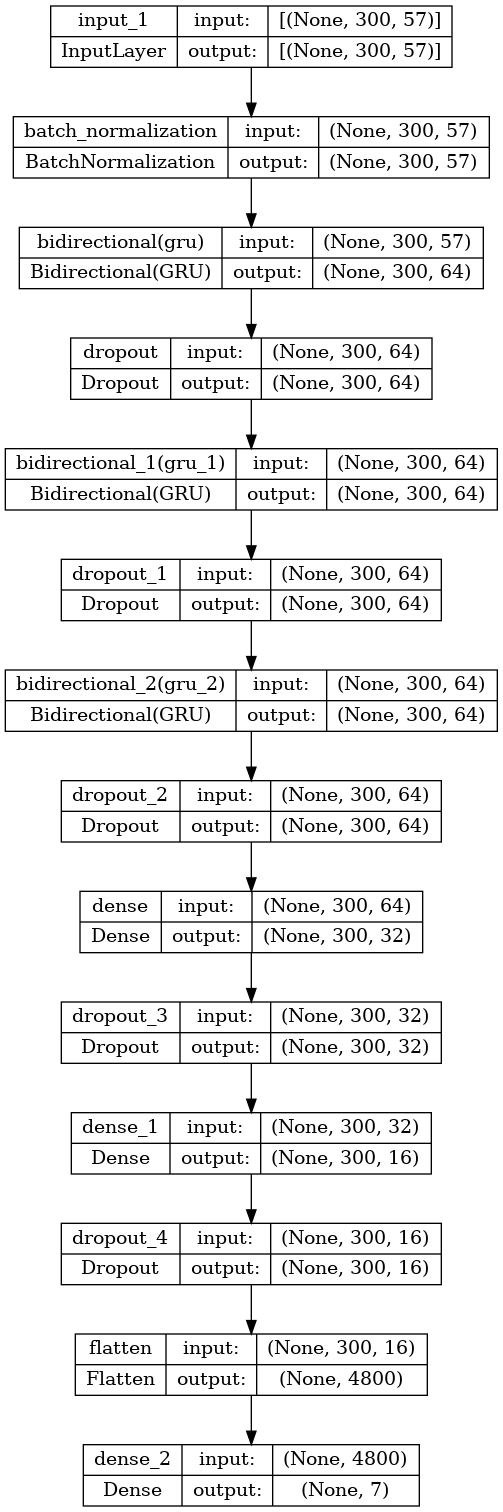

In [5]:
model = Sequential()

model.add(InputLayer(input_shape=(300, 57)))
model.add(BatchNormalization())

model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True, to_file=os.path.join(path_save,'model.png'))

In [6]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
#es_va = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('model_classifier.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000, verbose=1, shuffle=True, callbacks=[mc])

Epoch 1/1000


2023-05-12 15:33:27.451482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


8/9 [=========================>....] - ETA: 0s - loss: 1.9312 - accuracy: 0.2109
Epoch 1: val_accuracy improved from -inf to 0.22097, saving model to model_classifier.h5
9/9 [==============================] - 12s 304ms/step - loss: 1.9291 - accuracy: 0.2113 - val_loss: 1.9641 - val_accuracy: 0.2210
Epoch 2/1000
8/9 [=========================>....] - ETA: 0s - loss: 1.7622 - accuracy: 0.3252
Epoch 2: val_accuracy did not improve from 0.22097
9/9 [==============================] - 1s 91ms/step - loss: 1.7603 - accuracy: 0.3258 - val_loss: 2.0421 - val_accuracy: 0.1835
Epoch 3/1000
9/9 [==============================] - ETA: 0s - loss: 1.6436 - accuracy: 0.3577
Epoch 3: val_accuracy improved from 0.22097 to 0.37453, saving model to model_classifier.h5
9/9 [==============================] - 1s 101ms/step - loss: 1.6436 - accuracy: 0.3577 - val_loss: 1.8473 - val_accuracy: 0.3745
Epoch 4/1000
9/9 [==============================] - ETA: 0s - loss: 1.5809 - accuracy: 0.3793
Epoch 4: val_accur

In [7]:
saved_model = load_model('model_classifier.h5')
loss, acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

9/9 [==============================] - 2s 27ms/step - loss: 1.4237 - accuracy: 0.8390
Test loss: 1.423738718032837
Test accuracy: 0.8389512896537781


In [8]:
y_pred=saved_model.predict(X_test)
y_test_inv=[]
y_test_integer=[]
y_pred_inv=[]
y_pred_integer=[]

for i, y in enumerate(y_test):
    inverted = label_encoder.inverse_transform([np.argmax(y[0:])])
    y_test_inv.append(str(inverted))
    y_test_integer.append(np.argmax(y[0:]))

for i, y in enumerate(y_pred):
    inverted = label_encoder.inverse_transform([np.argmax(y[0:])])
    y_pred_inv.append(str(inverted))
    y_pred_integer.append(np.argmax(y[0:]))

cf_df={'y_pred': y_pred_inv,
       'y_test': y_test_inv}

cf_df=pd.DataFrame(cf_df)
print(cf_df)

9/9 [==============================] - 2s 25ms/step
                     y_pred                  y_test
0              ['no_depth']            ['no_depth']
1         ['heels_lifting']       ['heels_lifting']
2    ['powerlifting_squat']  ['powerlifting_squat']
3    ['powerlifting_squat']            ['no_depth']
4    ['powerlifting_squat']        ['toes_lifting']
..                      ...                     ...
262       ['olympic_squat']       ['olympic_squat']
263       ['heels_lifting']       ['heels_lifting']
264        ['toes_lifting']        ['toes_lifting']
265        ['toes_lifting']        ['toes_lifting']
266     ['bending_forward']        ['toes_lifting']

[267 rows x 2 columns]


Confusion matrix, without normalization
[[20  1  0  0  1  1  1]
 [ 1 30  1  0  0  0  0]
 [ 1  2 28  1  0  0  1]
 [ 0  0  1 33  0  2  0]
 [ 2  1  0  1 53  4  1]
 [ 1  0  0  3  0 34  1]
 [ 1  8  0  2  0  4 26]]
Normalized confusion matrix
[[0.83333333 0.04166667 0.         0.         0.04166667 0.04166667
  0.04166667]
 [0.03125    0.9375     0.03125    0.         0.         0.
  0.        ]
 [0.03030303 0.06060606 0.84848485 0.03030303 0.         0.
  0.03030303]
 [0.         0.         0.02777778 0.91666667 0.         0.05555556
  0.        ]
 [0.03225806 0.01612903 0.         0.01612903 0.85483871 0.06451613
  0.01612903]
 [0.02564103 0.         0.         0.07692308 0.         0.87179487
  0.02564103]
 [0.02439024 0.19512195 0.         0.04878049 0.         0.09756098
  0.63414634]]


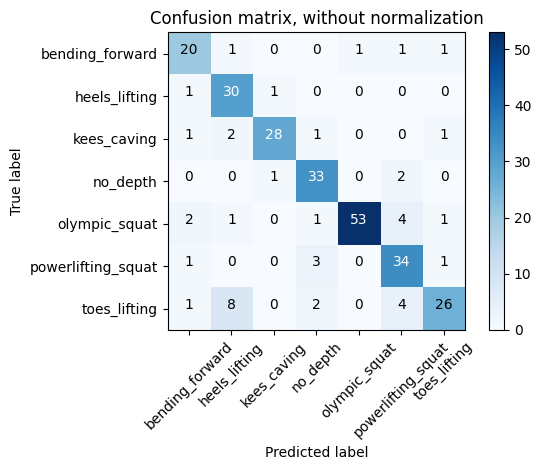

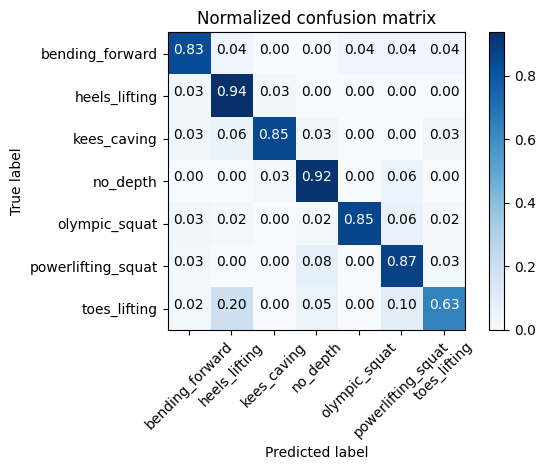

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Compute confusion matrix
class_names = ['bending_forward', 'heels_lifting', 'kees_caving', 'no_depth', 'olympic_squat', 'powerlifting_squat', 'toes_lifting']
cnf_matrix = confusion_matrix(cf_df['y_test'],cf_df['y_pred'])
# np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig(os.path.join(path_save, 'confusion_matrix.png'))
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(os.path.join(path_save, 'confusion_matrix_normalized.png'))

plt.show()

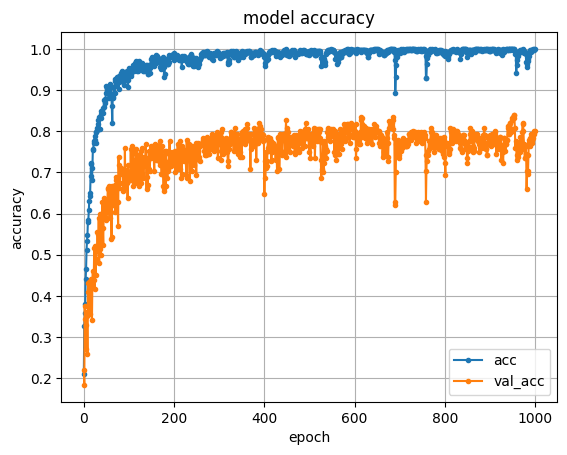

In [10]:
plt.plot(history.history['accuracy'], marker='.')
plt.plot(history.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.savefig(os.path.join(path_save, 'model_accuracy_lstm_8.png'))
#plt.close()
plt.show()

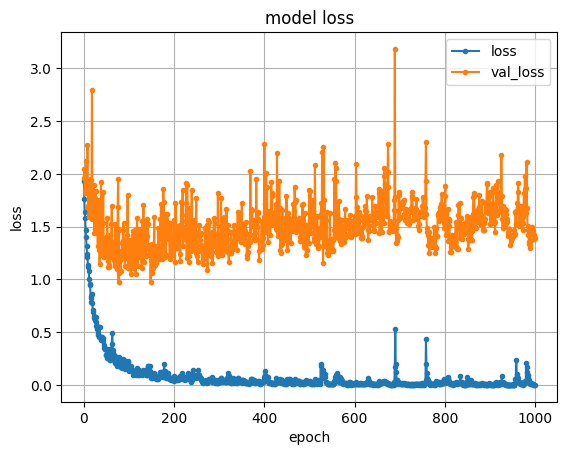

In [11]:
plt.plot(history.history['loss'], marker='.')
plt.plot(history.history['val_loss'], marker='.')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.savefig(os.path.join(path_save, 'model_loss_lstm_8.png'))
#plt.close()
plt.show()